In [5]:
import torch
from torch import nn
from d2l import torch as d2l

In [6]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

## 4.2.1 初始化模型参数
我们的隐藏层层数和隐藏单元数可以看成是**超参数** ，我们一般选择2的若干次幂作为层的宽度，往往计算高效

In [7]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

## 4.2.2 激活函数


In [8]:
def relu(X):
    a = torch.zero_like(X)
    return torch.max(X,a)

## 4.2.3 模型

In [9]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1) # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

## 4.2.4 损失函数

In [10]:
loss = nn.CrossEntropyLoss(reduction='none')

## 4.2.5 训练

AttributeError: module 'torch' has no attribute 'zero_like'

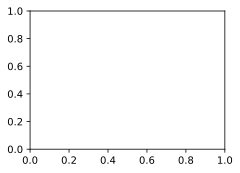

In [11]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)